## Importing required libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ftfy
from unidecode import unidecode

## load the dataset

In [2]:
# Load the Excel file
file_path = 'DataSets/Places_Final.xlsx'
df = pd.read_excel(file_path)
df.head()

,name,activities,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,"['beach visits', 'beachfront dining', 'surfing']",6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,"['beach visits', 'beachfront dining', 'snorkel...",5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,['Mirissa Beach is truly a gem on Sri Lanka's ...
2,Weligama Beach (surf and stay),"['beach visits', 'surfing']",5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,"['beach visits', 'surfing']",5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,"['beach visits', 'snorkeling', 'surfing', 'tur...",6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                411 non-null    object 
 1   activities          411 non-null    object 
 2   lat                 411 non-null    float64
 3   lng                 411 non-null    float64
 4   formatted_address   411 non-null    object 
 5   rating              390 non-null    float64
 6   user_ratings_total  390 non-null    float64
 7   latest_reviews      411 non-null    object 
dtypes: float64(4), object(4)
memory usage: 25.8+ KB


In [4]:
df.shape #number of rows and columns

(411, 8)

In [5]:
df.nunique()

name                  400
activities            355
lat                   404
lng                   399
formatted_address     221
rating                 24
user_ratings_total    338
latest_reviews        410
dtype: int64

In [9]:
df.describe()

,lat,lng,rating,user_ratings_total
count,410.000000,410.000000,355.000000,355.000000
mean,7.304668,80.583211,4.459437,1608.639437
std,0.994841,0.518571,0.433211,3607.678752
min,5.941381,79.694183,0.900000,27.000000
25%,6.629356,80.213274,4.300000,147.000000
50%,7.012780,80.536523,4.500000,375.000000
75%,7.947930,80.946773,4.750000,1245.500000
max,9.820859,81.859583,5.000000,26736.000000


In [6]:
df.isnull().sum()

name                   0
activities             0
lat                    0
lng                    0
formatted_address      0
rating                21
user_ratings_total    21
latest_reviews         0
dtype: int64

In [7]:
#number of Missing values as a percentage
(df.isnull().sum()/(len(df)))*100

name                  0.000000
activities            0.000000
lat                   0.000000
lng                   0.000000
formatted_address     0.000000
rating                5.109489
user_ratings_total    5.109489
latest_reviews        0.000000
dtype: float64

In [13]:
# Remove rows with any null values
df1 = df.dropna()

In [37]:
# Remove some columns from data set
df2 = df1.drop(['lat','lng','formatted_address'], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 410
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                390 non-null    object 
 1   activities          390 non-null    object 
 2   rating              390 non-null    float64
 3   user_ratings_total  390 non-null    float64
 4   latest_reviews      390 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.3+ KB


## Clean the latest reviews column

In [38]:
def clean_text_with_ftfy(text):
    fixed_text = ftfy.fix_text(text)
    return unidecode(fixed_text)


# Clean all reviews in the 'latest_reviews' column
df2['cleaned_reviews'] = df2['latest_reviews'].apply(clean_text_with_ftfy)

In [39]:
df2

,name,activities,rating,user_ratings_total,latest_reviews,cleaned_reviews
0,Arugam Bay Beach,"['beach visits', 'beachfront dining', 'surfing']",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,"['beach visits', 'beachfront dining', 'snorkel...",4.6,1748.0,['Mirissa Beach is truly a gem on Sri Lanka's ...,['Mirissa Beach is truly a gem on Sri Lanka's ...
2,Weligama Beach (surf and stay),"['beach visits', 'surfing']",4.4,325.0,['Weligama Beach is a fantastic spot for both ...,['Weligama Beach is a fantastic spot for both ...
4,Hikkaduwa Beach,"['beach visits', 'snorkeling', 'surfing', 'tur...",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...,['Hikkaduwa Beach is a delightful escape for s...
5,Tangalle,"['beach visits', 'surfing']",5.0,3.0,['Tangalle was a bit of a letdown for me. The ...,['Tangalle was a bit of a letdown for me. The ...
...,...,...,...,...,...,...
406,Uppuveli Beach,"[ 'beach visits', 'snorkeling', 'sailing', 'tu...",4.3,399.0,['Uppuveli Beach is a stunning escape! The sof...,['Uppuveli Beach is a stunning escape! The sof...
407,Koggala Beach,"['snorkeling', 'scuba diving', 'turtle watchin...",4.3,353.0,['Koggala Beach is a hidden gem! The soft sand...,['Koggala Beach is a hidden gem! The soft sand...
408,Marakolliya Beach,"['surfing', 'whale watching']\n",4.3,180.0,['Marakolliya Beach is a hidden gem! The waves...,['Marakolliya Beach is a hidden gem! The waves...
409,Pasikuda Beach,"['beach visits', 'photography']\n",4.4,1142.0,['Pasikuda Beach is a hidden gem! The pristine...,['Pasikuda Beach is a hidden gem! The pristine...


In [41]:
df2.describe()

,rating,user_ratings_total
count,390.000000,390.000000
mean,4.460513,1542.046154
std,0.429419,3474.795235
min,0.900000,1.000000
25%,4.300000,135.250000
50%,4.500000,354.500000
75%,4.775000,1239.500000
max,5.000000,26736.000000


In [42]:
cat_cols=df2.select_dtypes(include=['object']).columns
num_cols = df2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['name', 'activities', 'latest_reviews', 'cleaned_reviews'], dtype='object')
Numerical Variables:
['rating', 'user_ratings_total']


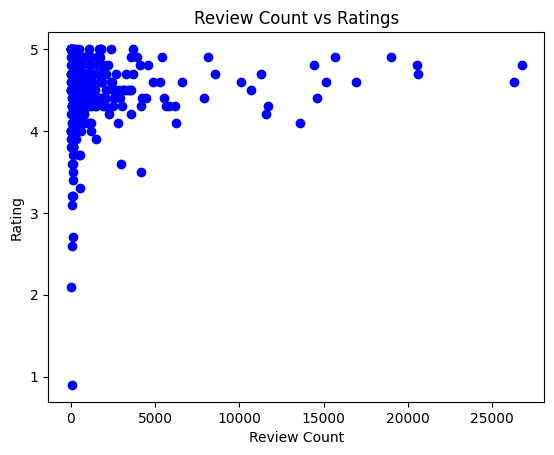

In [43]:
# Create a scatter plot
plt.scatter(df2['user_ratings_total'], df2['rating'], color='blue')

# Add labels and a title
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.title('Review Count vs Ratings')

# Show the plot
plt.show()


## Save the preprocessed dataset

In [40]:
# Save the preprocessed DataFrame as an Excel file
df2.to_excel('places_final_edition.xlsx', index=False)

In [39]:
# #Weighted Average

# #Calculating components for the weighted average formula

# v = df1['user_ratings_total']
# R = df1['rating']
# C = df1['rating'].mean()
# m = df1['user_ratings_total'].quantile(0.70)

In [40]:
# df1['weighted_average'] = ((R*v) + (C*m)) / (v + m)